# Ratios de convergencia

**Ratio de convergencia lineal:** $\;$ en problemas convexos, descenso por gradiente **converge linealmente con ratio (orden)** $\mu\in(0,1)$
$$\lvert\mathcal{L}(\boldsymbol{\theta}_{t+1})-\mathcal{L}(\boldsymbol{\theta_*})\rvert\leq\mu%
\lvert\mathcal{L}(\boldsymbol{\theta}_t)-\mathcal{L}(\boldsymbol{\theta_*})\rvert$$

**Objetivo cuadrático:** $\;$ si $\,\mathcal{L}(\boldsymbol{\theta})=\frac{1}{2}\boldsymbol{\theta}^t\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b}^t\boldsymbol{\theta}+c,\,$ $\,\mathbf{A}\succ\boldsymbol{0},\,$ $\mu$ es función del número de condición de $\mathbf{A}$, $\kappa(\mathbf{A})=\dfrac{\lambda_{\text{max}}}{\lambda_{\text{min}}}$
$$\mu=\left(\frac{\lambda_{\text{max}}(\mathbf{A})-\lambda_{\text{min}}(\mathbf{A})}{\lambda_{\text{max}}(\mathbf{A})+\lambda_{\text{min}}(\mathbf{A})}\right)^2=\left(\frac{\kappa(\mathbf{A})-1}{\kappa(\mathbf{A})+1}\right)^2\Rightarrow\lim_{\kappa\to1^+}\mu(\kappa)=0$$

**Objetivo no cuadrático:** $\;$ si es localmente cuadrático, $\mu$ dependerá del número de condición de la Hessiana ($\mathbf{A}$)

**Ejemplo:** $\;\mathbf{A}=\begin{pmatrix}20&5\\5&16\end{pmatrix}\,$ bien condicionada y 
$\;\mathbf{A}=\begin{pmatrix}20&5\\5&2\end{pmatrix}\,$ peor condicionada; $\;\boldsymbol{b}=(-14, -6)^t$, $\;c=10$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
def plot_8_2_3(ax, x, y, L, TH, levels=30, shrink=0.8):
    X, Y = np.meshgrid(x, y); XY = np.c_[np.ravel(X), np.ravel(Y)]; LL = np.apply_along_axis(L, 1, XY)
    ax.contour(X, Y, LL.reshape(X.shape), levels, colors='orange')
    cp = ax.contourf(X, Y, LL.reshape(X.shape), levels, cmap='Greys')
    plt.colorbar(cp, ax=ax, shrink=shrink)
    T = TH.shape[0]; lines = np.hstack((TH[:-1, :], TH[1:, :])).reshape(T-1, 2, 2)
    ax.add_collection(LineCollection(lines, colors='black', linestyle='solid'));
    ax.scatter(TH[:, 0], TH[:, 1], s=15, c='black', marker='o')

Número de condición:  30.2336
Theta:  [0.02261953 1.3221    ]  en  66 iteraciones


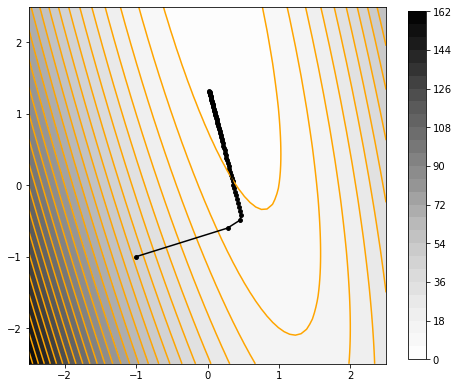

In [2]:
import numpy as np
import matplotlib.pyplot as plt
eta = 0.02 # <--- con otros valores no converge o lo hace muy lentamente
# A, b, c = np.array([ [20, 5], [5, 16] ]), np.array([-14, -6]), 10 # <--- bien condicionada
A, b, c = np.array([ [20, 5], [5,  2] ]), np.array([-14, -6]), 10 # <--- mal condicionada
print("Número de condición: ", np.round(np.linalg.cond(A), 4))
L = lambda th: 0.5 * th.T @ A @ th + b @ th + c
grad = lambda th: (A + A.T) @ th + b
T = 100; TH = np.zeros((T, 2)); TH[0, :] = np.array([-1.0, -1.0])
tol = 0.01; delta = np.inf; t = 1
while np.max(np.abs(delta)) > tol and t < T:
    delta = -eta * grad(TH[t-1, :]); TH[t, :] = TH[t-1, :] + delta; t = t + 1
th1, th2 = np.linspace(-2.5, 2.5, num=64), np.linspace(-2.5, 2.5, num=64)
fig, ax = plt.subplots(1, 1, figsize=(8, 8)); ax.set(aspect='equal')
plot_8_2_3(ax, th1, th2, L, TH[:t, :]); print("Theta: ", TH[t-1, :], " en ", t-1 , "iteraciones")